In [6]:
import pandas as pd
df=pd.read_csv('sales_store.csv')

<ipython-input-6-32277217e115>:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('sample_data/sales_store.csv')


In [7]:
df.head()

,Unnamed: 0,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,...,month,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,0,1,5,2015-07-31,5263,555,1,1,0,1,...,7,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,2,5,2015-07-31,6064,625,1,1,0,1,...,7,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,2,3,5,2015-07-31,8314,821,1,1,0,1,...,7,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,3,4,5,2015-07-31,13995,1498,1,1,0,1,...,7,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,4,5,5,2015-07-31,4822,559,1,1,0,1,...,7,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844338 entries, 0 to 844337
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 844338 non-null  int64  
 1   Store                      844338 non-null  int64  
 2   DayOfWeek                  844338 non-null  int64  
 3   Date                       844338 non-null  object 
 4   Sales                      844338 non-null  int64  
 5   Customers                  844338 non-null  int64  
 6   Open                       844338 non-null  int64  
 7   Promo                      844338 non-null  int64  
 8   StateHoliday               844338 non-null  object 
 9   SchoolHoliday              844338 non-null  int64  
 10  year                       844338 non-null  int64  
 11  Quarter                    844338 non-null  int64  
 12  month                      844338 non-null  int64  
 13  StoreType                  84

In [10]:
df['StoreType'] = df['StoreType'].astype(str)
df['Assortment'] = df['Assortment'].astype(str)
df['StateHoliday'] = df['StateHoliday'].astype(str)
# Convert 'Date' column to datetime data type
df['Date'] = pd.to_datetime(df['Date'])


In [11]:
!pip install pystan==2.19.1.1
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pystan-2.19.1.1.tar.gz (16.2 MB)
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.19.1.1-cp39-cp39-linux_x86_64.whl size=61826221 sha256=62e39a5df6f3602728b7a369da42d64af02b69ea54ccbc40091bfc9f30745716
  Stored in directory: /root/.cache/pip/wheels/b8/36/bf/7ec7e363f796373cea3eb9ea94e83f5bbbb586d2edbf7e3417
Successfully built pystan
  Attempting uninstall: pystan
    Found existing installation: pystan 3.6.0
    Uninstalling pystan-3.6.0:
      Successfully uninstalled pystan-3.6.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9436942 sha256=c4f96e690ad5bafd334e6ec908932b45ffcdac9305a2fedcb1fbcb22eaaa4397
  Stored in direc

In [13]:
import pandas as pd
from fbprophet import Prophet

# Prepare the data for Prophet model
df = df[['Date', 'Sales']]  # Select only 'Date' and 'Sales' columns
df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' column to datetime
df = df.rename(columns={'Date': 'ds', 'Sales': 'y'})  # Rename columns as required by Prophet model

# Create and fit the Prophet model
model = Prophet()
model.fit(df)

# Make future dataframe for 5 months (150 days) ahead
future = model.make_future_dataframe(periods=150)

# Forecast sales for the next 5 months
forecast = model.predict(future)

# Extract the relevant columns from the forecast
forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

# Rename the columns for better interpretation
forecast = forecast.rename(columns={'ds': 'Date', 'yhat': 'Sales_Forecast', 'yhat_lower': 'Sales_Forecast_Lower', 'yhat_upper': 'Sales_Forecast_Upper'})

# Filter the forecast for the next 5 months
forecast_next_5_months = forecast.tail(150)

# Print the forecast for the next 5 months
print(forecast_next_5_months)


<ipython-input-13-bbb6039d0411>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' column to datetime
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/loc

           Date  Sales_Forecast  Sales_Forecast_Lower  Sales_Forecast_Upper
942  2015-08-01     6172.089875           2215.014920           9902.606494
943  2015-08-02     8534.071210           4748.246859          12231.821203
944  2015-08-03     8538.632852           4696.901012          12302.153812
945  2015-08-04     7409.625788           3377.334387          11171.793059
946  2015-08-05     7075.415399           3304.145387          10972.231458
...         ...             ...                   ...                   ...
1087 2015-12-24     6125.228034          -1945.344329          14308.832487
1088 2015-12-25     6291.615144          -1138.038817          14364.929653
1089 2015-12-26     4942.690315          -2411.834755          12786.062650
1090 2015-12-27     7158.030893           -212.210973          15363.486791
1091 2015-12-28     7008.992718           -840.396596          15266.978701

[150 rows x 4 columns]


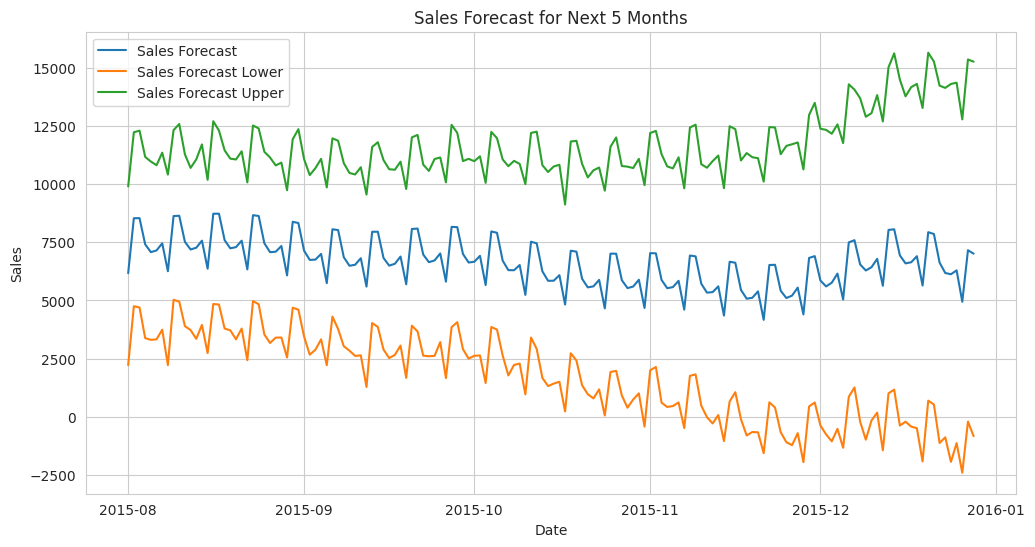

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the forecast
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x='Date', y='Sales_Forecast', data=forecast_next_5_months, ax=ax, label='Sales Forecast')
sns.lineplot(x='Date', y='Sales_Forecast_Lower', data=forecast_next_5_months, ax=ax, label='Sales Forecast Lower')
sns.lineplot(x='Date', y='Sales_Forecast_Upper', data=forecast_next_5_months, ax=ax, label='Sales Forecast Upper')
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
ax.set_title('Sales Forecast for Next 5 Months')
plt.legend()
plt.show()


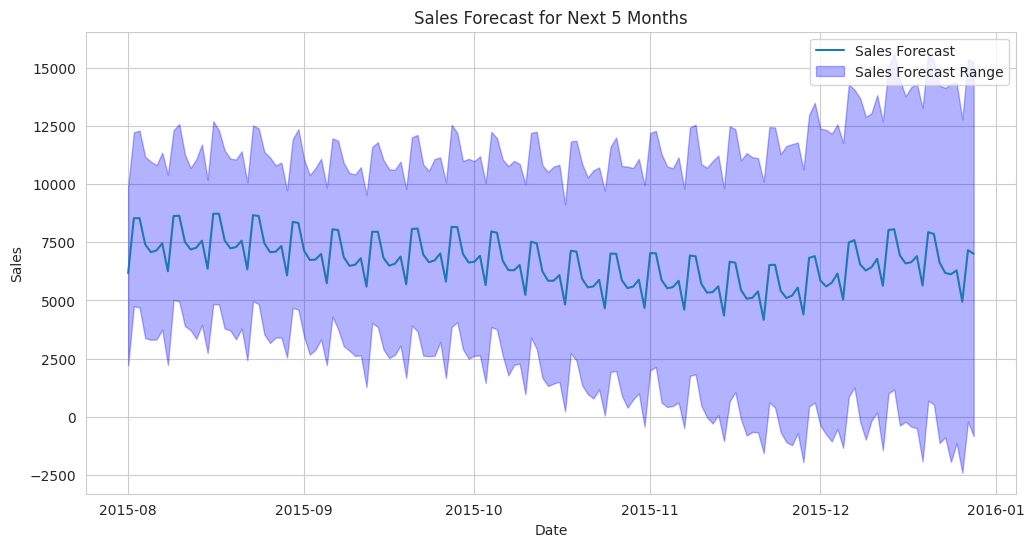

In [17]:
import matplotlib.pyplot as plt

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the forecast
ax.plot(forecast_next_5_months['Date'], forecast_next_5_months['Sales_Forecast'], label='Sales Forecast')
ax.fill_between(forecast_next_5_months['Date'], forecast_next_5_months['Sales_Forecast_Lower'], forecast_next_5_months['Sales_Forecast_Upper'], alpha=0.3, color='blue', label='Sales Forecast Range')

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
ax.set_title('Sales Forecast for Next 5 Months')

# Add legend
ax.legend()

# Show the plot
plt.show()



In [26]:
import numpy as np

# Calculate actual vs predicted sales
actual = df.tail(150)['y'].values
predicted = forecast_next_5_months['Sales_Forecast'].values

# Calculate evaluation metrics
rmspe = np.sqrt(np.mean(((actual - predicted)/actual)**2))
mae = np.mean(np.abs(actual - predicted))

# Print evaluation metrics
print('Root Mean Squared Percentage Error (RMSPE): {:.2%}'.format(rmspe))
print('Mean Absolute Error (MAE): {:.2f}'.format(mae))


Root Mean Squared Percentage Error (RMSPE): 57.55%
Mean Absolute Error (MAE): 2306.75
